2. 

The statement, "It is important to note that outcomes of tests refer to the population parameter, rather than the sample statistic! As such, the result that we get is for the population," conveys the idea that tests ultimatley give results for the population not the sample used. With individual data points denoted x_i, when tested upon we take these points in order to create a statistic so that we can extrapolate some data ffrom it that ccan furtther desccribe the population. The sample average denoted x barre simillairly uses individuall data points and averagges them out. This informatuon doesnt just tell us the samplle average but can be used in bootstrapping to see if the sample average reasonable esitamtes the popullaton peramter. Population averaged denoted μ, gives the true average of the population. And μ_0 is a specific hypothesized value of the population used as a vallue that oyu want to test again.

4. 

A p-value is the probability that a statistic is as or more extreme than the observed statistic, if the null hypothesis is true. If the p value was very small then it shows how ridiculous one must be to concldue that tthe nulll hypothsis is true becasue the odds of the observed data happening just randomly is so low. So in short, a very low chance that an event happens depsite assumed to being random implies that the assumption is more than likely wrong.

8. 

This experiment aims to test whether a random sample of STA130 students can correctly tell if a cup of tea with milk in it was poured with milk then tea or vice versa. We want to see if one could taste the difference between the order in which a cup of tea is poured, or if it just occurs by chance. We'll analyze data collected from 80 students in which 49 correctly guessed the order and the rest did not.

Null Hypothesis:

There are no discernable methods to determine the order in which the tea was poured. The probababillty of students that correctly answered and incorrectly answered are equal.

What this means is that none of the 80 STA130 students ability to determine the order of tea being poured is acctalty real. The results merely appeared by chance and no students have some secret skill of tea pour order.

Alternative Hypothesis:

There is a method to determine the order in which the tea was poured. The probababillty of students that correctly answered will then be different then those that incorrectly answered. Thus the null hypothesis is false as it is somehow possible to determine the order that tea is poured without the answer just being caused by chance.


Suppose the null hypothesis is true so that we can calccuallte the p-value. If the p-value is greater then 0.05 then the null hypothesis is true, otherwise if it is less then 0.05 then the null hypothesis is more likely to be false. Below is the graph of the distribution of the null hyptohesis in orange, the dotted red line marks the mean proportion of correct answers from the observed data, and shaded in gray area the p-value. We will calculate the p-value and if the p-value is less then 0.05 then an arrgument can be made against the validity of the nulll hypothessi being true.

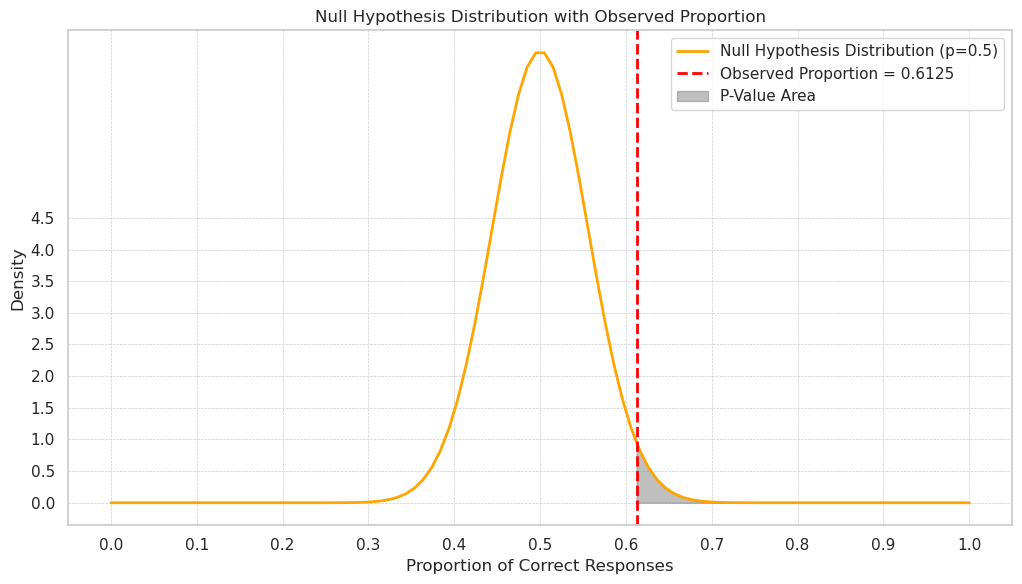

Sample Mean (Proportion of Correct Responses): 0.6125
P-Value: 0.0221


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Data
correct = 49
incorrect = 31
total_students = 80
prop_correct = correct / total_students  # This should equal 49/80 = 0.6125

# Null hypothesis parameters
null_mean = 0.5  # Null hypothesis: chance level of 50%
null_std = np.sqrt(null_mean * (1 - null_mean) / total_students)

# Create x values for the null hypothesis distribution
x_null = np.linspace(0, 1, 100)
y_null = stats.norm.pdf(x_null, null_mean, null_std)

# Create a figure
plt.figure(figsize=(20, 6))

# Create plot for the null hypothesis distribution
plt.subplot(1, 2, 2)
plt.plot(x_null, y_null, color='orange', label='Null Hypothesis Distribution (p=0.5)', linewidth=2)

# Highlight the observed proportion
plt.axvline(x=prop_correct, color='red', linestyle='--', linewidth=2, label='Observed Proportion = {:.4f}'.format(prop_correct))

# Calculate p-value
p_value = stats.norm.sf(prop_correct, null_mean, null_std)  # One-tailed p-value

# Highlight the p-value area
x_fill = np.linspace(prop_correct, 1, 100)
y_fill = stats.norm.pdf(x_fill, null_mean, null_std)
plt.fill_between(x_fill, y_fill, alpha=0.5, color='gray', label='P-Value Area')

# Adding annotations and grid
plt.title('Null Hypothesis Distribution with Observed Proportion')
plt.xlabel('Proportion of Correct Responses')
plt.ylabel('Density')
plt.xticks(np.arange(0, 1.1, 0.1))  # Set x-ticks for better grid visibility
plt.yticks(np.arange(0, 5, 0.5))     # Set y-ticks for better grid visibility
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()

# Print the observed proportion and p-value
print("Sample Mean (Proportion of Correct Responses): {:.4f}".format(prop_correct))
print("P-Value: {:.4f}".format(p_value))


The p-value is callcualted as being 0.0221 which is lless then 0.05. This impllies that there is moderate evidence against the null hypothesis, becasue the probailltiy of the extremes of the samplle data having occured is smaller then the probaiblltiy of outcomes with a true null hypothesis, then we can conclude that the null hypothesis is false. Diving deeper we will estimate a range for the populalltion to quanitfy the uncertaintiy of the data by bootstrapping the dataset using the statistic of the proportion of correct answers.

In [ ]:
import matplotlib.pyplot as plt

# Data
labels = ['Correct', 'Incorrect']
counts = [49, 80 - 49]  # 80 - 49 = 31
prop_correct = 49/80


# Create bar plot
plt.bar(labels, counts, color=['green', 'red'])
plt.title('Tea Pouring Identification Results')
plt.xlabel('Response')
plt.ylabel('Number of Students')
plt.ylim(0, 60)
plt.show()


print("Sample Mean: "+ str(prop_correct))

The distribution below represents the bootstrapped distribution of the intial sample of data.

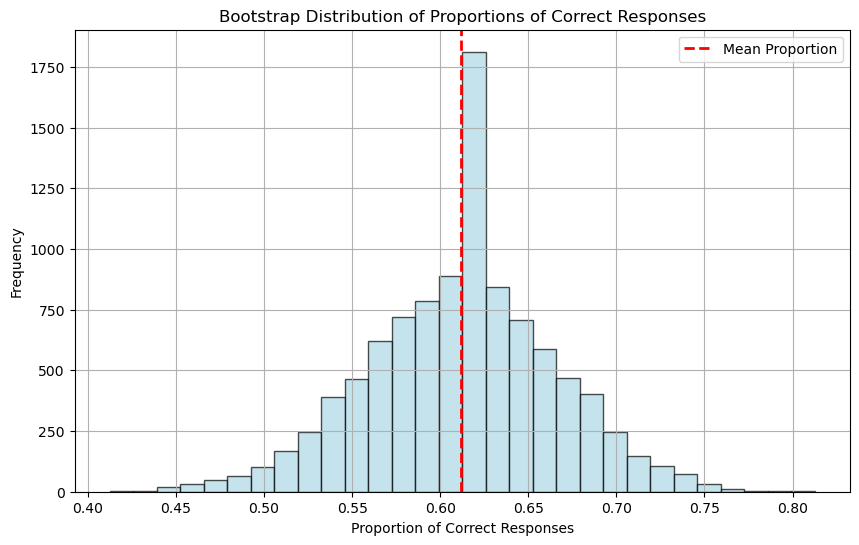

Mean Proportion: 0.612
95% Confidence Interval: [0.5    0.7125]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Original data: 1 for correct, 0 for incorrect
data = [1] * 49 + [0] * 31

# Bootstrap parameters
n_iterations = 10000  # Number of bootstrap samples
n_size = len(data)   # Size of the original sample

# Storage for bootstrap proportions
bootstrap_proportions = []

np.random.seed(21)

# Bootstrapping
for _ in range(n_iterations):
    # Create a bootstrap sample
    sample = np.random.choice(data, size=n_size, replace=True)
    # Calculate the proportion of correct responses
    proportion = np.mean(sample)
    bootstrap_proportions.append(proportion)

# Plotting the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_proportions, bins=30, color='lightblue', edgecolor='black', alpha=0.7)
plt.axvline(x=np.mean(bootstrap_proportions), color='red', linestyle='dashed', linewidth=2, label='Mean Proportion')
plt.title('Bootstrap Distribution of Proportions of Correct Responses')
plt.xlabel('Proportion of Correct Responses')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

# Print the mean and 95% confidence intervals
conf_int = np.percentile(bootstrap_proportions, [2.5, 97.5])
print(f'Mean Proportion: {np.mean(bootstrap_proportions):.3f}')
print(f'95% Confidence Interval: {conf_int}')

The 95% confidence interval is between 0.5-0.7125. Since the observed proportion lies within the interval this tells us that the true population parameter (the proportion of students who answered correctly) is consistant with the population parameter we are estimating. 

As was observed we determined that the null hypothesis was more likely to be false. This means that the likely hood of the sample proportion of correct being answeres was low enough such that we can conclude that some students were able to determienthe order of tea being poured without guessingg. 

Afterwards, a bootstrapped anaysis was done on the sample of data. It was found that affter 10000 bootstrapped datasets, that the average mean proporion of correct answers was 0.612 (61.2%). This alligns exactlly with the observed datas mean proportion, clleary showing that data from the experiment llies within the 95% confidence interval. With this informatiuon we can not only conffidentlly concllude that the null hypothesis is false, but also that the observed data has a high likillood of representing the true mean proportion of correct answers.

Chat Bot Summaries:

Chat Bot 1:

In this conversation, you asked about several statistical concepts and analyses related to hypothesis testing, bootstrapping, and confidence intervals. We discussed:

Hypothesis Testing: You asked about determining if the null hypothesis is true using the p-value. We clarified that a small p-value suggests rejecting the null hypothesis, indicating that an observed effect is statistically significant.

Using Bootstrapping: You explored how bootstrapping can be used after hypothesis testing to further investigate the data, including refining estimates, constructing confidence intervals, assessing the stability of the findings, and performing power analysis.

Confidence Intervals: You asked what it means if the sample is within the confidence interval, and we explained that it suggests the sample statistic is a plausible estimate of the population parameter.

Tea Experiment: We reviewed a classic experiment involving Fisher's tea tasting and applied a hypothesis test to determine if students were guessing or had some ability to identify the pouring order. You worked on formulating a statistical analysis for a similar experiment with students.

Statistical Explanation: You drafted an explanation about the tea experiment, including hypothesis testing and bootstrapping, and we refined it to ensure accuracy and clarity.

The conversation centered on how to use p-values and bootstrapping to strengthen conclusions from sample data, particularly in hypothesis testing scenarios.

Link: https://chatgpt.com/c/670c7757-1da0-800c-aa3f-65676835c0fe

Chat Bot 2:

In our conversation, we discussed visualizing data from an experiment where 49 out of 80 students correctly identified whether milk or tea was poured first. You provided the code for a bar plot of the observed data, and I helped extend it by adding the null hypothesis distribution (where students guess with a 50% chance) for comparison. We worked on displaying both the observed data and null hypothesis distribution, aiming to calculate and highlight the p-value.

The key focus was on ensuring:

The correct observed proportion of 
0.6125
0.6125 was displayed.
A clear comparison between the observed data and null hypothesis.
The plot had a proper grid with clear x-ticks and y-ticks for better visualization of the distributions and the p-value area.
Ultimately, we aimed to represent both the observed data and null hypothesis graphically, to assess statistical significance through a p-value calculation.

Link: https://chatgpt.com/c/670c8069-471c-800c-9e05-13c73d1c2528